In [ ]:
!pip install rdkit

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.rdMolDescriptors import GetMACCSKeysFingerprint
import pandas as pd
from multiprocessing import Pool, cpu_count
import time
import matplotlib.pyplot as plt
from rdkit import Chem, DataStructs
from rdkit.Chem import (
    PandasTools,
    Draw,
    Descriptors,
    MACCSkeys,
    rdFingerprintGenerator,
)

In [ ]:
df_final_passed = pd.read_csv("canonical_EDB2M.smi", sep='\t', header = None, names = ["smi", "ID"])

select = df_final_passed

CC(=O)N[C@@H](CC1=CC=C(C2=CC=CC=C12)N(C3=CC=CC=C3C(=O)O)C(=O)C(=O)O)C(=O)NCCCCCOC4=CC5=CC=CC=C5C=C4C(=O)O


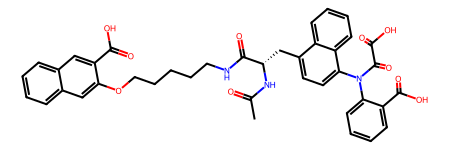

In [ ]:
query = "CC(=O)N[C@@H](CC1=CC=C(C2=CC=CC=C12)N(C3=CC=CC=C3C(=O)O)C(=O)C(=O)O)C(=O)NCCCCCOC4=CC5=CC=CC=C5C=C4C(=O)O"
def canonical_smiles(query):
    mols = [Chem.MolFromSmiles(smi) for smi in query]
    query = [Chem.MolToSmiles(mol) for mol in mols]
    return query

print(query)

query = Chem.MolFromSmiles(query)
query

In [ ]:
#### Generate MACCS and Morgan fingerprints for the query molecule.
fpg = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)
maccs_fp_query = MACCSkeys.GenMACCSKeys(query)
circular_fp_query = fpg.GetCountFingerprint(query)

In [ ]:
PandasTools.AddMoleculeColumnToFrame(select, "smi")
circular_fp_list = select["ROMol"].apply(fpg.GetCountFingerprint).tolist()
maccs_fp_list = select["ROMol"].apply(MACCSkeys.GenMACCSKeys).tolist()

In [ ]:
select["tanimoto_maccs"] = DataStructs.BulkTanimotoSimilarity(maccs_fp_query, maccs_fp_list)
select["tanimoto_morgan"] = DataStructs.BulkTanimotoSimilarity(circular_fp_query, circular_fp_list)

In [ ]:
select["dice_maccs"] = DataStructs.BulkDiceSimilarity(maccs_fp_query, maccs_fp_list)
select["dice_morgan"] = DataStructs.BulkDiceSimilarity(circular_fp_query, circular_fp_list)

In [ ]:
PandasTools.AddMoleculeColumnToFrame(select, smilesCol="smi")
PandasTools.RenderImagesInAllDataFrames(True)

,smi,ID,ROMol,tanimoto_maccs,tanimoto_morgan,dice_maccs,dice_morgan
1242165,O=C(N[C@@H](Cc1c[nH]c2ccccc12)C(=O)Nc1ccc2cccc...,Z89269103,,0.463768,0.417143,0.633663,0.588710
570505,O=C(COc1cc2ccccc2cc1C(=O)NCc1ccccc1)NCc1ccccc1,Z26237541,,0.716667,0.412791,0.834951,0.584362
570589,CCCCc1ccc(NC(=O)COc2cc3ccccc3cc2C(=O)NCc2ccccc...,Z26237593,,0.746032,0.402235,0.854545,0.573705

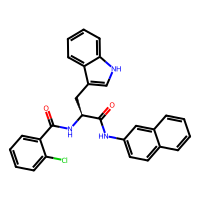
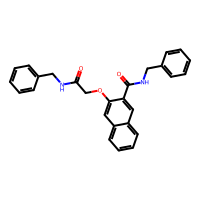
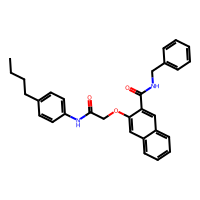

In [ ]:
PandasTools.RenderImagesInAllDataFrames(True)
select.sort_values(["tanimoto_morgan"], ascending=False).head(3)


,smi,ID,ROMol,tanimoto_maccs,tanimoto_morgan,dice_maccs,dice_morgan
1319449,CC(OC(=O)c1ccccc1NCCO)C(=O)N1CC(=O)Nc2ccccc21,Z112321394,,0.846154,0.232432,0.916667,0.377193
1988522,CC(=O)NC1CCCN(C(=O)COC(=O)c2cc3c(cc2O)CCCC3)C1,Z857281408,,0.846154,0.130653,0.916667,0.231111
167424,Cc1ccc(C(N)=O)c(OCC(=O)N(CCC(N)=O)c2ccccc2)c1,Z217923262,,0.822581,0.234637,0.902655,0.380090

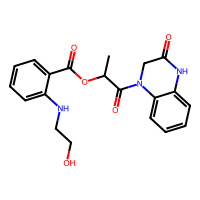
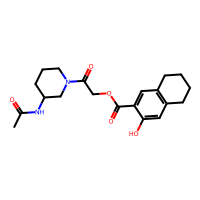
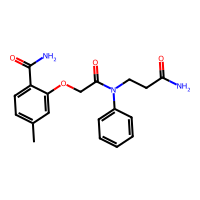

In [ ]:
PandasTools.RenderImagesInAllDataFrames(True)
select.sort_values(["tanimoto_maccs"], ascending=False).head(3)

,smi,ID,ROMol,tanimoto_maccs,tanimoto_morgan,dice_maccs,dice_morgan
0,Cn1cc(I)cn1,Z1238965084,,0.118421,0.024390,0.211765,0.047619
1,Brc1csc(Br)n1,Z1696844463,,0.053333,0.030675,0.101266,0.059524
2,Brc1nnc(Br)s1,Z56871608,,0.063291,0.018182,0.119048,0.035714
3,Ic1cnccn1,Z1695759744,,0.101449,0.030488,0.184211,0.059172
4,Brc1csc(Br)c1,Z2050725166,,0.028571,0.037037,0.055556,0.071429

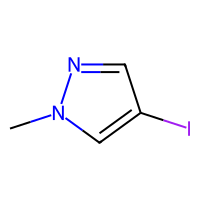
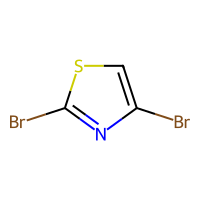
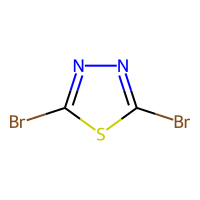
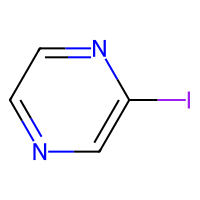
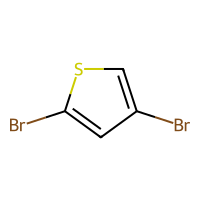

In [ ]:
select.head()

In [ ]:
criteria = [
    (select["tanimoto_morgan"] >= 0.30),
    (select["tanimoto_maccs"]  >= 0.50),
    (select["dice_morgan"]      >= 0.40),
    (select["dice_maccs"]       >= 0.55),
]

# 2) 4개 중 3개 이상 True면 통과
pass_count = sum(c.astype(int) for c in criteria)
selection = (pass_count >= 3)

# 3) 필터링
df_selected = select[selection].copy()

# 4) 저장
#df_selected.to_csv("selected_ligands3.smi", sep="\t", header=False, index=False)
df_selected[["ID", "smi"]].to_csv(
    "selected_ligands_1st.smi",  # 저장 파일 이름
    sep="\t",                             # 탭으로 구분
    header=False,                         # 컬럼명 저장 안 함
    index=False                            # 인덱스 저장 안 함
)

In [ ]:
import pandas as pd

In [ ]:
select = pd.read_csv("selected_ligands.smi", sep='\t', header=None)
select.head()

,0,1,2,3,4,5,6
0,O=C1CNC(=O)N1CCBr,Z317046558,<rdkit.Chem.rdchem.Mol object at 0x7fb7bdf651c0>,0.507042,0.047619,0.672897,0.090909
1,O=C(O)Cn1cc(Br)c(=O)[nH]c1=O,Z104341194,<rdkit.Chem.rdchem.Mol object at 0x7fb7bdfb3450>,0.513514,0.082840,0.678571,0.153005
2,O=C(O)CCn1cc(Br)ccc1=O,Z360008216,<rdkit.Chem.rdchem.Mol object at 0x7fb7bdfbf840>,0.507246,0.095238,0.673077,0.173913
3,Nc1cc2c(cc1Br)NC(=O)CO2,Z1365534365,<rdkit.Chem.rdchem.Mol object at 0x7fb7bdfc1a10>,0.514286,0.063218,0.679245,0.118919
4,CCOCCCN1C(=O)NC(=O)C1=O,Z57000474,<rdkit.Chem.rdchem.Mol object at 0x7fb7bdff97e0>,0.597222,0.080925,0.747826,0.149733


In [ ]:
select = pd.read_csv("selected_ligands.smi", sep='\t', header=None)

# 10개 열 이름 순서대로 지정
column_names = [
    'smi',
    'ID',
    'ROMol',
    'tanimoto_maccs',
    'tanimoto_morgan',
    'dice_maccs',
    'dice_morgan',
    # 데이터프레임이 10개 열이라면, 여기에 나머지 3개 열 이름이 필요합니다.
    # 만약 위 7개 열만 있고 나머지 3개는 다른 정보라면, 추가 정보를 알려주세요.
]

In [ ]:
select

,0,1,2,3,4,5,6
0,O=C1CNC(=O)N1CCBr,Z317046558,<rdkit.Chem.rdchem.Mol object at 0x7fb7bdf651c0>,0.507042,0.047619,0.672897,0.090909
1,O=C(O)Cn1cc(Br)c(=O)[nH]c1=O,Z104341194,<rdkit.Chem.rdchem.Mol object at 0x7fb7bdfb3450>,0.513514,0.082840,0.678571,0.153005
2,O=C(O)CCn1cc(Br)ccc1=O,Z360008216,<rdkit.Chem.rdchem.Mol object at 0x7fb7bdfbf840>,0.507246,0.095238,0.673077,0.173913
3,Nc1cc2c(cc1Br)NC(=O)CO2,Z1365534365,<rdkit.Chem.rdchem.Mol object at 0x7fb7bdfc1a10>,0.514286,0.063218,0.679245,0.118919
4,CCOCCCN1C(=O)NC(=O)C1=O,Z57000474,<rdkit.Chem.rdchem.Mol object at 0x7fb7bdff97e0>,0.597222,0.080925,0.747826,0.149733
...,...,...,...,...,...,...,...
683825,C#CC1(O)CCN(C(=O)NC(C)c2ccc(OC(F)F)cc2)CC1,Z2936915743,<rdkit.Chem.rdchem.Mol object at 0x7fb7b06628f0>,0.540541,0.113990,0.701754,0.204651
683826,C#CC1(O)CCN(C(=O)NC2CCN(c3ccccc3)CC2)CC1,Z2936915744,<rdkit.Chem.rdchem.Mol object at 0x7fb7b0662960>,0.513514,0.101010,0.678571,0.183486
683827,C#CC1(O)CCN(C(=O)NCCc2ccc(Cl)cc2Cl)CC1,Z2936915745,<rdkit.Chem.rdchem.Mol object at 0x7fb7b06629d0>,0.533333,0.111111,0.695652,0.200000
683828,C#CC1(O)CCN(C(=O)NCCOc2c(C)cccc2C)CC1,Z2936915746,<rdkit.Chem.rdchem.Mol object at 0x7fb7b0662a40>,0.652778,0.121053,0.789916,0.215962
